# Axisymmetric TC test
From Marcus (1984b), Section 3. 

$$\eta = 0.875 $$
$$\mathrm{R_c} = 118.16$$
$$\mathrm{R} = 1.179 \mathrm{R_c}$$
$$\lambda = 2.5$$


## Circular Couette flow
Before the instability, the background Circular Couette flow (CCF) should have energy per unit axial length $E_{CCF} = 7.32$ and enstrophy per unit axial length $\mathcal{E}_{CCF} = 20.5$.

## Taylor Couette flow
After instability $E= 7.14$ and $\mathcal{E} = 27.1$

In [1]:
%matplotlib inline
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [3]:
filename = "../scratch/TC_run_re1.39e+02_mu0.00e+00_eta8.75e-01_filter5.00e-01_nr64_ntheta64_nz64/profiles/profiles_s1.h5"

In [28]:
profiles = h5py.File(filename, "r")

In [29]:
print(list(profiles['tasks/'].keys()))

['KE', 'Re_rms', 'epicyclic_freq_sq', 'u_rms', 'v_rms', 'v_tot', 'w_rms']


In [30]:
r = profiles['scales/r/1.0'][:]

Text(0,0.5,'v')

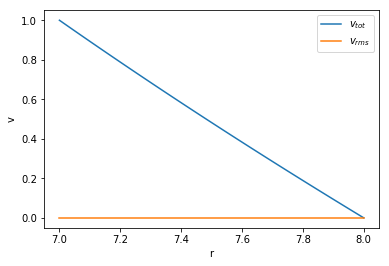

In [31]:
plt.figure()
plt.plot(r, profiles['tasks/v_tot'][0,0,0,:], label=r'$v_{tot}$')
plt.plot(r, profiles['tasks/v_rms'][0,0,0,:], label=r'$v_{rms}$')
plt.legend()
plt.xlabel('r')
plt.ylabel('v')

In [32]:
profiles['tasks/v_tot'].shape

(10, 1, 64, 64)

In [33]:
def calc_v0(eta, r):
    v0 = eta/(1-eta**2) * (1/(r*(1-eta)) - r*(1-eta))
    return v0

In [34]:
eta = 0.875


In [35]:
v0 = calc_v0(eta, r)

Text(0,0.5,'analytic CCF - v_tot(t=0)')

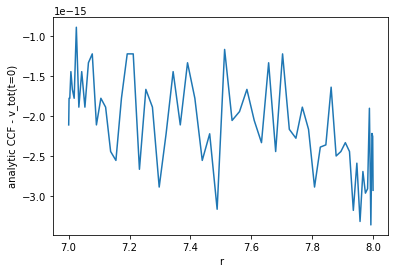

In [39]:
plt.figure()
plt.plot(r,v0-profiles['tasks/v_tot'][0,0,0,:])
plt.xlabel('r')
plt.ylabel('analytic CCF - v_tot(t=0)')

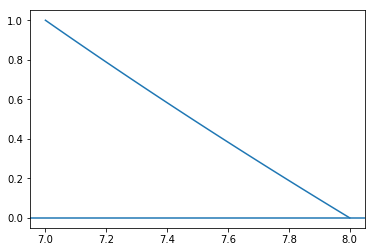

In [37]:
plt.figure()
plt.plot(r,profiles['/tasks/v_tot'][0,0,0,:] - profiles['tasks/v_rms'][0,0,0,:])
plt.axhline(0)

In [40]:
def E_cc(eta):
    E = np.pi*eta**2/((1-eta)**3*(1+eta)) * ((eta**2 - 3)/4. - np.log(eta)/(1-eta**2))
    return E

In [41]:
E_cc(eta)

7.3169036849220257

In [42]:
import dedalus.public as de

In [46]:
r= de.Chebyshev('r',128, interval=[7., 8.])
d = de.Domain([r,], grid_dtype='float')

DEBUG:domain:Global coeff shape: [128]
DEBUG:distributor:Mesh: []


In [47]:
v0 = d.new_field()

In [48]:
v0['g'] = calc_v0(eta,r.grid())

In [55]:
v0_sq = d.new_field()

In [69]:
v0_sq = (0.5*v0*v0).evaluate()

In [71]:
v0_sq['g'] *= r.grid()

In [72]:
v0_sq_int = v0_sq.integrate()

In [73]:
v0_sq_int['g'][0]*2*np.pi

7.316903684922007